In [3]:
import cv2

img = cv2.imread('data/img_1115.jpg')

cv2.imshow('img', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [4]:
def end(ms=0):
    cv2.waitKey(ms)
    cv2.destroyAllWindows()

# 픽셀값 변경하기

In [5]:
# 가로 : 320
# 세로 : 790
img.shape

(1400, 1000, 3)

In [6]:
# [세로,가로] = 픽셀의 RGB
img[790, 320] = [0,0,0]

In [7]:
cv2.imshow('img',img)
end()

# 색상 추적

In [8]:
# HSV : Hue(색상), Saturation(채도), Value(명도)
# 색상 : -180 ~ 180
# 채도, 명도 : 0 ~ 255

In [9]:
import cv2
import numpy as np

img = cv2.imread('data/balloon.jpg')

img_hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

# 최소값
lower = np.array([-10, 100, 100])

# 최대값
upper = np.array([10, 255, 255])

# 최소값과 최대값을 사용해서 색의 범위를 마스킹
mask = cv2.inRange(img_hsv, lower, upper)

img_range = cv2.bitwise_and(img, img, mask=mask)

cv2.imshow('balloon',img)
cv2.imshow('hsv', img_hsv)
cv2.imshow('range', img_range)
end()

# 이미지 자르기

In [10]:
import cv2

img = cv2.imread('data/img_1115.jpg')

cv2.imshow('img',img)

end()

In [11]:
# x, y
# 좌상단 170,0
# 우하단 910, 850

In [12]:
# y, x로 접근
# roi = Region of Image
roi = img[0:850, 170:910]
cv2.imshow('roi', roi)
end()

In [13]:
# roi를 원래 이미지에 표시
# cv2.rectangle = 이미지에 사각형 그리기
# cv2.putText = 이미지에 글씨 쓰기

In [14]:
import cv2

img = cv2.imread('data/img_1115.jpg')

# rectangle(사용할 이미지, 좌상단 좌표(x,y), 우하단 좌표(x,y), 색상(BGR), 선두께)
roi_img = cv2.rectangle(img, (170, 0), (910, 850), (0, 255, 0), 3)

# putText(사용할 이미지, 출력할 내용, 출력 좌표(좌측하단), 폰트, 글씨크기, 색상(BGR), 선두께)
roi_img = cv2.putText(roi_img, 'img', (170, 850), cv2.FONT_HERSHEY_PLAIN, 4, (0, 255, 0), 3)

cv2.imshow('roi_img', roi_img)
end()

# 이미지 필터링 - 모자이크

In [15]:
import cv2
import numpy as np

img = cv2.imread('data/img_1115.jpg')

kernel = np.ones((5,5), np.float) / 25

blur = cv2.filter2D(img, -1, kernel)

cv2.imshow('blur', blur)
end()

C:\Users\smhrd\AppData\Local\Temp\ipykernel_17728\1382840295.py:6: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  kernel = np.ones((5,5), np.float) / 25


# 침식과 팽창
- 검정배경에 흰색 물체에 사용하는 방법 > 흑백이미지
- erosion(침식) : 이미지의 경계부분을 배경부분로 변경하는 작업
    - 흰색이 검은색으로 변경
    - 물체의 테두리가 작아짐
- dilation(팽창) : 이미지의 배경부분을 경게부분로 변경하는 작업
    - 검은색이 흰색으로 변경
    - 물체의 테두리가 커짐

In [16]:
import cv2
import numpy as np

img = cv2.imread('data/number.png', cv2.IMREAD_GRAYSCALE)

kernel = np.ones((3,3), np.float32)

erosion = cv2.erode(img, kernel, iterations = 1)
dilation = cv2.dilate(img, kernel, iterations = 1)

cv2.imshow('original', img)
cv2.imshow('erosion', erosion)
cv2.imshow('dilation', dilation)

end()

# Opening과 Closing
- Opening : 침식후에 팽창을 수행하는것, 배경에 노이즈가 있을때
- Closing : 팽창후에 침식을 수행하는것, 물체에 노이즈가 있을때

In [17]:
import cv2
import numpy as np

imgA = cv2.imread('data/noise_A.png', cv2.IMREAD_GRAYSCALE)
imgB = cv2.imread('data/noise_B.png', cv2.IMREAD_GRAYSCALE)

cv2.imshow('A_original', imgA)
cv2.imshow('B_original', imgB)

kernel = np.ones((3,3), np.float32)

img_a_opening = cv2.morphologyEx(imgA, cv2.MORPH_OPEN, kernel)
img_b_closing = cv2.morphologyEx(imgB, cv2.MORPH_CLOSE, kernel)

cv2.imshow('A_opening', img_a_opening)
cv2.imshow('B_closing', img_b_closing)

end()

# 에지 추출기 - Canny
- 테두리 판별기

In [18]:
import cv2

img = cv2.imread('data/img_1115.jpg', cv2.IMREAD_GRAYSCALE)

# 이미지, 최소값, 최대값
# 값의 범위가 클수록 적은 테두리가 나옴
edge = cv2.Canny(img, 100, 150)

# 색상 반전
edge2 = cv2.bitwise_not(edge)

cv2.imshow('img', img)
cv2.imshow('edge', edge)
cv2.imshow('edge2', edge2)

end()

# 윤곽선 추출
- 이진이미지를 대상으로 윤곽선 추출

In [19]:
import cv2

img = cv2.imread('data/img_1115.jpg')

gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

# 이진 이미지 변환
ret, thr = cv2.threshold(gray, 50, 255, 0)

# 윤곽선 추출
contours, _ = cv2.findContours(thr, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# 추출된 윤곽선 그리기
# drawContours(이미지, 윤곽선 값, 외곽선 인덱스(-1이면 전체 출력), 색상(BGR), 선두께) 
cv2.drawContours(img, contours, -1, (0,255,0), 4)

cv2.imshow('thr',thr)
cv2.imshow('contour', img)

end()

# 이미지 색상분포 균일화

In [20]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('data/histogram.png', cv2.IMREAD_GRAYSCALE)
cv2.imshow('original', img)

end()

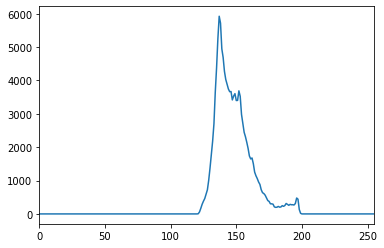

In [21]:
# calcHist(이미지, 채널, 특정부분 마스크, 색상 개수, 픽셀값의 범위)
hist = cv2.calcHist([img],[0],None,[256],[0,255])

plt.plot(hist)
plt.xlim([0, 255])
plt.show()

end()

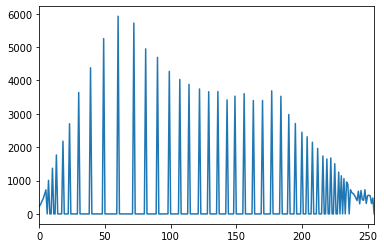

In [22]:
img = cv2.equalizeHist(img)

cv2.imshow('equalize', img)

hist = cv2.calcHist([img],[0],None,[256],[0,255])

plt.plot(hist)
plt.xlim([0, 255])
plt.show()

end()

# 이미지에서 원 찾기

In [23]:
import cv2
import numpy as np

img = cv2.imread('data/signal_light.jpg')
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

# 원 찾기
circles = cv2.HoughCircles(img_gray, # 사용 이미지
                           cv2.HOUGH_GRADIENT, # 찾는 방법
                           1, # 변환 이미지 비율(1 추천)
                           10, # 원 중심간의 최소거리
                           param1 = 60, # Canny 연산자의 최대값
                           param2 = 50, # 카운트 값(작으면 많은 원을 찾음)
                           minRadius = 10, # 원의 최소 반지름
                           maxRadius = 100 # 원의 최대 반지름
                          )

print(circles)

[[[332.5 172.5  46.3]
  [338.5 264.5  35.5]
  [329.5  70.5  36.1]]]


In [24]:
# (X중심점,  Y중심점, 반지름)
# 찾은 원 이미지에 표현하기
if circles is not None:
    circles = np.uint16(np.around(circles))
    
    # 원을 하나씩 그리기
    for circle in circles[0,:]:
        cv2.circle(img, # 사용이미지
                   (circle[0], circle[1]), # 중심좌표
                   circle[2], # 반지름
                   (255,0,0), # 원 색상(BGR)
                   2 # 선 두께
                  )
    cv2.imshow('circle', img)
    end()

# 템플릿 매칭
- 이미지안에서 원하는 이미지를 검색하는 방법

In [25]:
import cv2
import numpy as np

img = cv2.imread('data/game.png')
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
temp = cv2.imread('data/game_cut.png', cv2.IMREAD_GRAYSCALE)

# 찾을 이미지의 가로, 세로 크기
h, w = temp.shape

# matchTemplate(배경이미지, 찾을이미지, 찾을방법)
res = cv2.matchTemplate(img_gray, temp, cv2.TM_CCOEFF_NORMED)
res


array([[-0.27828193, -0.26786092, -0.26797706, ..., -0.2678619 ,
        -0.2678619 , -0.2804727 ],
       [-0.16234161,  0.        ,  0.        , ...,  0.        ,
         0.        , -0.19911349],
       [-0.16234764,  0.        ,  0.        , ...,  0.        ,
         0.        , -0.19911274],
       ...,
       [-0.03787773,  0.00655395,  0.03424266, ...,  0.        ,
         0.        , -0.19911198],
       [-0.04360088,  0.0011822 ,  0.02795814, ...,  0.        ,
         0.        , -0.19911198],
       [-0.05025474, -0.00467988,  0.02220466, ...,  0.        ,
         0.        , -0.19910997]], dtype=float32)

In [26]:
# 각 픽셀에서 찾을 이미지와 배경이미지가 얼마나 유사한지 표현
# 0.6 ~ 0.7 정도 나와야 유사
# np.where : True값의 위치(인덱스)를 반환
loc = np.where(res >= 0.678)
for pt in zip(*loc[::-1]):
    cv2.rectangle(img, pt, (pt[0] + w, pt[1] + h), (0,255,0), 2)

cv2.imshow('img',img)
end()

In [27]:
loc[::-1] # 순서를 역순으로 출력

(array([108, 227, 316,  33, 182, 346,  48, 227, 391, 152], dtype=int64),
 array([ 77,  77,  77, 137, 137, 137, 256, 256, 256, 315], dtype=int64))

In [28]:
arr = np.arange(10)
print(arr)
print(arr[::2]) # 처음부터 끝까지 2 칸 간격으로 출력
print(arr[::-2]) # 처음부터 끝까지 -2 칸 간격으로 출력(=역순, 두칸간격으로)
print(arr[1::2]) # 1번 인텍스부터 끝까지 두칸 간격으로 출력
print(arr[1:6:2]) # 1번 인텍스부터 5번 인덱스까지 두칸 간격으로 출력

[0 1 2 3 4 5 6 7 8 9]
[0 2 4 6 8]
[9 7 5 3 1]
[1 3 5 7 9]
[1 3 5]


# Haar Cascade 분류기를 사용한 얼굴, 눈 검출

In [29]:
import cv2

# 얼굴 검출기 (얼굴 알고리즘)
face_cascade = cv2.CascadeClassifier("data/haarcascade_frontalface_default.xml")
# 얼굴 안에 있는 눈 검출기 (눈 알고리즘)
eye_cascade = cv2.CascadeClassifier("data/haarcascade_eye.xml")

img = cv2.imread('data/face.jpg')
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

# 얼굴 검출기 적용해서 얼굴좌표 가져오기(좌상단 x, 좌상단 y, 너비(w), 높이(h))
# detectMultiScale(이미지, 스케일 값, 최소이웃값)
faces = face_cascade.detectMultiScale(img_gray, 1.3, 5)

for (x, y, w, h) in faces:
    cv2.rectangle(img, (x, y), (x + w, y + h), (0,255,0), 2)
    
    # 눈 검출
    # 얼굴안에 눈이 있기 때문에 얼굴영역 안에서 진행
    # 얼굴 ROI(Region of Image) 저장
    roi_gray = img_gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    
    # 눈 영역 검출 (좌상단 x, 좌상단 y, 너비(w), 높이(h))
    eyes = eye_cascade.detectMultiScale(roi_gray, 1.035, 2)
    for (ex, ey, eh, ew) in eyes:
        cv2.rectangle(roi_color, (ex, ey), (ex+ew, ey+eh), (255,0,0), 2)
    
cv2.imshow('face', img)
end()

In [ ]:
cap1 = cv2.VideoCapture('data/ellon.mp4')
cap = cv2.VideoCapture('data/cat.mp4')

# 얼굴 검출기 (얼굴 알고리즘)
face_cascade = cv2.CascadeClassifier("data/haarcascade_frontalface_default.xml")
# 얼굴 안에 있는 눈 검출기 (눈 알고리즘)
eye_cascade = cv2.CascadeClassifier("data/haarcascade_eye.xml")

while True:
    ret, frame = cap.read()
    
    if not ret:
        print('동영상을 종료합니다')
        cap.release()
        cv2.destroyAllWindows()
        break
        
    img_gray = cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY)
    
    faces = face_cascade.detectMultiScale(img_gray, 1.3, 5)

    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y), (x + w, y + h), (0,255,0), 2)

#         # 눈 검출
#         # 얼굴안에 눈이 있기 때문에 얼굴영역 안에서 진행
#         # 얼굴 ROI(Region of Image) 저장
#         roi_gray = img_gray[y:y+h, x:x+w]
#         roi_color = frame[y:y+h, x:x+w]

#         # 눈 영역 검출 (좌상단 x, 좌상단 y, 너비(w), 높이(h))
#         eyes = eye_cascade.detectMultiScale(roi_gray, 1.15, 2)
#         for (ex, ey, eh, ew) in eyes:
#             cv2.rectangle(roi_color, (ex, ey), (ex+ew, ey+eh), (255,0,0), 2)
    
    cv2.imshow('face', frame)
    
    k = cv2.waitKey(33)
    
    if k == 49:
        cap.release()
        cv2.destroyAllWindows()
        break